In [1]:
import pandas as pd
import numpy as np


In [2]:
import wget
wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv')

'teleCust1000t (2).csv'

In [3]:
df = pd.read_csv('teleCust1000t.csv')

In [4]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='income', ylabel='Count'>

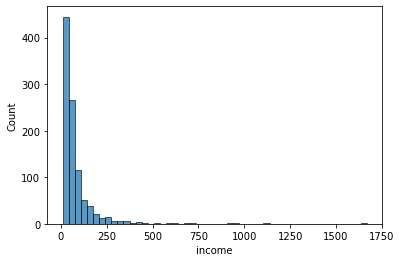

In [8]:
sns.histplot(df,x='income',bins=50)

## Feature Set

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
X = df[["region","tenure","age","marital","address","income","ed","employ","retire","gender","reside"]].values

In [13]:
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [14]:
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [15]:
y = df['custcat'].values

In [16]:
y[0:5]

array([1, 4, 3, 1, 3])

## Normalizing the Data

In [20]:
from sklearn import preprocessing
X = preprocessing .StandardScaler().fit(X).transform(X.astype(float))

In [21]:
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.15,random_state=4)

In [27]:
print(X_train.shape)

(850, 11)


In [28]:
print(X_test.shape)

(150, 11)


## Classification
### K Nearest Neighbor (KNN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

## Training

In [30]:
k=5
neigh=KNeighborsClassifier(n_neighbors=k)

In [31]:
neigh.fit(X_train,Y_train)

KNeighborsClassifier()

## Predicting

In [32]:
yhat = neigh.predict(X_test)

In [33]:
yhat[0:5]

array([1, 3, 2, 4, 4])

## Accuracy Evaluation

In [36]:
from sklearn import metrics

In [39]:
print("Train Data Accuracy: ",metrics.accuracy_score(Y_train,neigh.predict(X_train)))

Train Data Accuracy:  0.5423529411764706


In [42]:
print("Test Data Accuracy:  ",metrics.accuracy_score(Y_test,yhat))

Test Data Accuracy:   0.2866666666666667


## Building the model again with k=6

In [43]:
neigh2 = KNeighborsClassifier(n_neighbors=6)

In [44]:
neigh2.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [45]:
yhat2=neigh2.predict(X_test)

In [46]:
yhat2[0:5]

array([3, 3, 3, 4, 4])

In [49]:
print("Train data accuracy: ",metrics.accuracy_score(Y_train,neigh2.predict(X_train)))

Train data accuracy:  0.528235294117647


In [51]:
print("Test data accuracy: ",metrics.accuracy_score(Y_test,yhat2))

Test data accuracy:  0.30666666666666664


In [55]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3       , 0.29333333, 0.30666667, 0.29333333, 0.28666667,
       0.30666667, 0.3       , 0.3       , 0.31333333])

In [56]:
import matplotlib.pyplot as plt

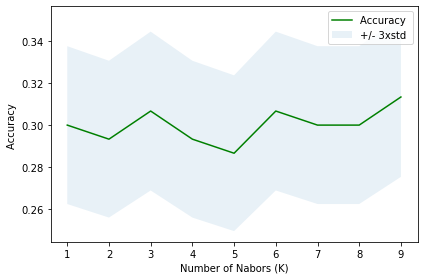

In [57]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
